In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
import shutil
import warnings
import random
import itertools
import glob
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline

In [4]:
os.listdir('D:\Data\COVID-19_Radiography_Dataset')

['COVID',
 'COVID.metadata.xlsx',
 'Lung_Opacity',
 'Lung_Opacity.metadata.xlsx',
 'Normal',
 'Normal.metadata.xlsx',
 'README.md.txt',
 'train',
 'Viral Pneumonia',
 'Viral Pneumonia.metadata.xlsx',
 'X_ray_train_data']

In [5]:
if os.path.isdir('D:/Data/COVID-19_Radiography_Dataset/train') is False:
    os.makedirs('D:/Data/COVID-19_Radiography_Dataset/train')
    destination = 'D:/Data/COVID-19_Radiography_Dataset/train'
    source1 = 'D:/Data/COVID-19_Radiography_Dataset/COVID'
    file1 = os.listdir(source1)
    no_of_file1 = len(file1) // 2
    source2 = 'D:/Data/COVID-19_Radiography_Dataset/Normal'
    file2 = os.listdir(source2)
    no_of_file2 = len(file2) // 2
    source3 = 'D:/Data/COVID-19_Radiography_Dataset/Viral Pneumonia'
    file3 = os.listdir(source3)
    no_of_file3 = len(file3) // 2
    for c in random.sample((file1), no_of_file1):
        shutil.move(os.path.join(source1, c), destination)
    for c in random.sample((file2), no_of_file2):
        shutil.move(os.path.join(source2, c), destination)
    for c in random.sample((file3), no_of_file3):
        shutil.move(os.path.join(source3, c), destination)
os.chdir('../../')  

In [6]:
filename = os.listdir('D:/Data/COVID-19_Radiography_Dataset/train')
classification = []
for file in filename:
    category = file.split('-')[0]
    if category == 'COVID':
        classification.append(0)
    elif category == 'Viral Pneumonia':
        classification.append(1)
    elif category == 'Normal':
        classification.append(2)
data = pd.DataFrame({'filename' : filename,
                     'category' : classification})  


In [7]:
classification[1999]

2

In [8]:
data.tail()

,filename,category
7571,Viral Pneumonia-993.png,1
7572,Viral Pneumonia-994.png,1
7573,Viral Pneumonia-995.png,1
7574,Viral Pneumonia-998.png,1
7575,Viral Pneumonia-999.png,1


In [9]:
data.head()

,filename,category
0,COVID-100.png,0
1,COVID-1002.png,0
2,COVID-1004.png,0
3,COVID-1005.png,0
4,COVID-1006.png,0


In [10]:
data['category'].value_counts()

2    5096
0    1808
1     672
Name: category, dtype: int64

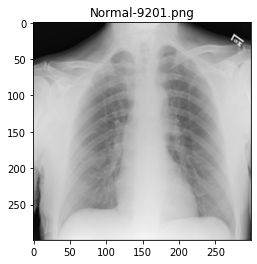

In [11]:
sample = random.choice(filename)
img = load_img('D:/Data/COVID-19_Radiography_Dataset/train/' + sample)
plt.title(sample)
plt.imshow(img)

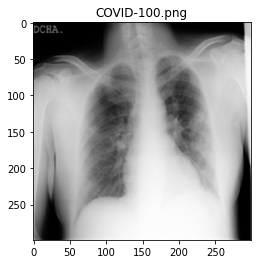

In [12]:
sample = 'COVID-100.png'
img = load_img('D:/Data/COVID-19_Radiography_Dataset/train/' + sample)
plt.title(sample)
plt.imshow(img)

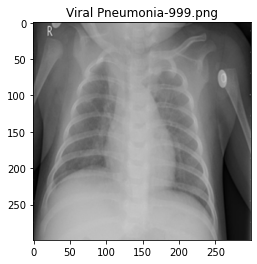

In [13]:
sample = 'Viral Pneumonia-999.png'
img = load_img('D:/Data/COVID-19_Radiography_Dataset/train/' + sample)
plt.title(sample)
plt.imshow(img)

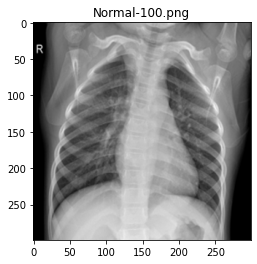

In [14]:
sample = 'Normal-100.png'
img = load_img('D:/Data/COVID-19_Radiography_Dataset/train/' + sample)
plt.title(sample)
plt.imshow(img)

In [15]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_CHANNELS = 3
IMAGE_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)

In [16]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.25),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.25),
    Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.25),
    Flatten(),
    Dense(units = 128, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 220, 220, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 108, 108, 64)      2

In [18]:
model.compile(optimizer = 'adam', metrics= ['accuracy'], loss = 'categorical_crossentropy')

In [19]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [20]:
data['category'] = data['category'].replace({0: 'COVID', 1: 'Viral Pneumonia', 2: 'Normal'})

In [21]:
data.head()

,filename,category
0,COVID-100.png,COVID
1,COVID-1002.png,COVID
2,COVID-1004.png,COVID
3,COVID-1005.png,COVID
4,COVID-1006.png,COVID


## Using Train Test Split

In [22]:
train, validate = train_test_split(data, test_size = 0.2, shuffle = True, random_state = 42, stratify = data['category'])

In [23]:
train.head(10)

,filename,category
3183,Normal-3287.png,Normal
1046,COVID-284.png,COVID
5329,Normal-7180.png,Normal
3170,Normal-3258.png,Normal
3330,Normal-3548.png,Normal
1318,COVID-3352.png,COVID
465,COVID-1837.png,COVID
4567,Normal-5808.png,Normal
5918,Normal-8195.png,Normal
6503,Normal-9256.png,Normal


In [24]:
validate.head()

,filename,category
7269,Viral Pneumonia-472.png,Viral Pneumonia
5167,Normal-6886.png,Normal
2998,Normal-2966.png,Normal
2178,Normal-1507.png,Normal
1484,COVID-391.png,COVID


In [25]:
train['category'].value_counts()

Normal             4076
COVID              1446
Viral Pneumonia     538
Name: category, dtype: int64

In [26]:
validate['category'].value_counts()

Normal             1020
COVID               362
Viral Pneumonia     134
Name: category, dtype: int64

In [27]:
batch_size = 10

In [28]:
train_datagen= ImageDataGenerator(zoom_range = 0.1, shear_range = 0.1, horizontal_flip = True, rescale = 1./255)
train_generator =train_datagen.flow_from_dataframe(train, 'D:/Data/COVID-19_Radiography_Dataset/train/', 
                                                  x_col = 'filename', y_col = 'category',target_size = IMAGE_SIZE,
                                                   
                                                  class_mode = 'categorical', batch_size = batch_size)

Found 6060 validated image filenames belonging to 3 classes.


In [29]:
valid_datagen= ImageDataGenerator(zoom_range = 0.1, shear_range = 0.1, horizontal_flip = True, rescale = 1./255)
valid_generator =valid_datagen.flow_from_dataframe(validate, 'D:/Data/COVID-19_Radiography_Dataset/train/', 
                                                  x_col = 'filename', y_col = 'category',target_size = IMAGE_SIZE,
                                                   
                                                  class_mode = 'categorical', batch_size = batch_size)

Found 1516 validated image filenames belonging to 3 classes.


In [30]:
example = train.sample(n=1).reset_index(drop = True)
example_generator = train_datagen.flow_from_dataframe(example, 'D:/Data/COVID-19_Radiography_Dataset/train/',
                                                   x_col = 'filename', y_col = 'category', target_size = IMAGE_SIZE,
                                                      
                                                   class_mode = 'categorical')

Found 1 validated image filenames belonging to 1 classes.


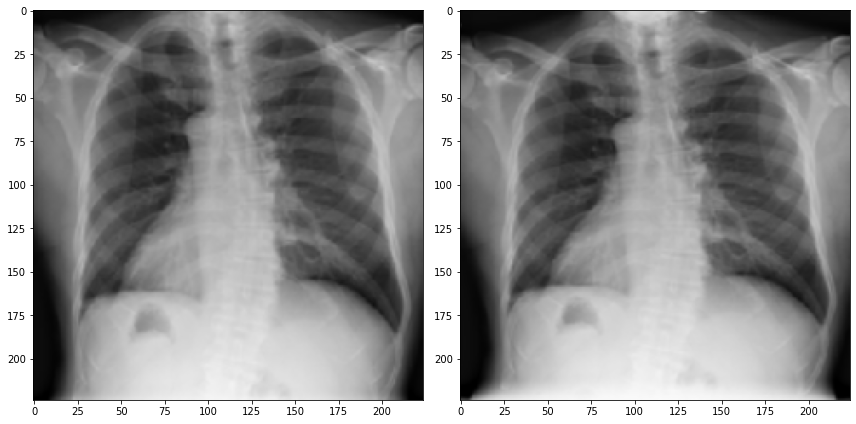

In [31]:
plt.figure(figsize = (12, 12))
for i in range(0, 2):
    plt.subplot(1, 2, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [32]:
model.fit(train_generator,validation_data=valid_generator,epochs=5,verbose=2)

Epoch 1/5
606/606 - 338s - loss: 0.5487 - accuracy: 0.7568 - val_loss: 0.5329 - val_accuracy: 0.7770
Epoch 2/5
606/606 - 308s - loss: 0.4520 - accuracy: 0.8078 - val_loss: 2.5081 - val_accuracy: 0.7493
Epoch 3/5
606/606 - 324s - loss: 0.4063 - accuracy: 0.8279 - val_loss: 0.4343 - val_accuracy: 0.8305
Epoch 4/5
606/606 - 332s - loss: 0.3950 - accuracy: 0.8340 - val_loss: 2.3802 - val_accuracy: 0.3694
Epoch 5/5
606/606 - 296s - loss: 0.3798 - accuracy: 0.8345 - val_loss: 0.3839 - val_accuracy: 0.8351


## Using KFold Crossvalidation

In [33]:
n_folds = 3
epochs = 5
batch_size = 10
for i in range(n_folds):
    train_fold, test_fold = train_test_split(data, test_size = 0.2, random_state = 42, shuffle = True, 
                                             stratify = data['category'])

In [41]:
train_datagen_fold= ImageDataGenerator(zoom_range = 0.1, shear_range = 0.1, horizontal_flip = True, rescale = 1./255)
train_generator_fold =train_datagen_fold.flow_from_dataframe(train_fold, 'D:/Data/COVID-19_Radiography_Dataset/train/', 
                                                  x_col = 'filename', y_col = 'category',target_size = IMAGE_SIZE,
                                                   
                                                  class_mode = 'categorical', batch_size = batch_size)

Found 6060 validated image filenames belonging to 3 classes.


In [42]:
valid_datagen_fold = ImageDataGenerator(zoom_range = 0.1, shear_range = 0.1, horizontal_flip = True, rescale = 1./255)
valid_generator_fold =valid_datagen_fold.flow_from_dataframe(test_fold, 'D:/Data/COVID-19_Radiography_Dataset/train/', 
                                                  x_col = 'filename', y_col = 'category',target_size = IMAGE_SIZE,
                                                  class_mode = 'categorical', batch_size = batch_size)

Found 1516 validated image filenames belonging to 3 classes.


In [43]:
example = train.sample(n=1).reset_index(drop = True)
example_generator = train_datagen_fold.flow_from_dataframe(example, 'D:/Data/COVID-19_Radiography_Dataset/train/',
                                                   x_col = 'filename', y_col = 'category', target_size = IMAGE_SIZE,
                                                      
                                                   class_mode = 'categorical')

Found 1 validated image filenames belonging to 1 classes.


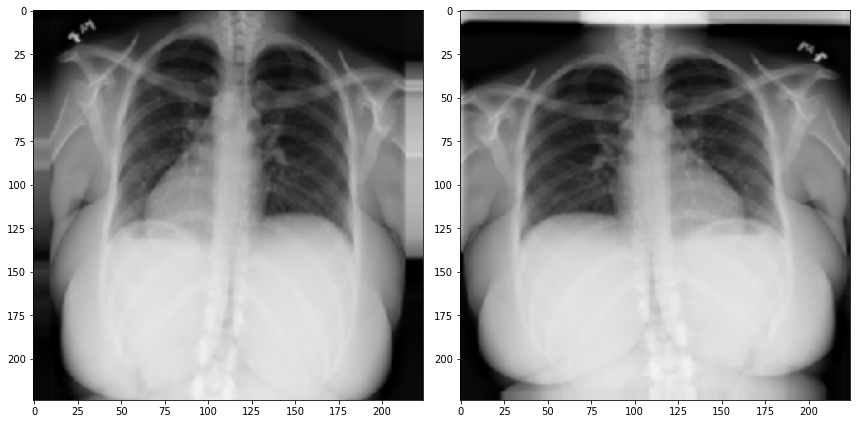

In [44]:
plt.figure(figsize = (12, 12))
for i in range(0, 2):
    plt.subplot(1, 2, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [39]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs available: ", len(physical_devices))

Num GPUs available:  1


In [45]:
model.fit(train_generator_fold,validation_data=valid_generator_fold,epochs=5,verbose=2)

Epoch 1/5
606/606 - 212s - loss: 0.3522 - accuracy: 0.8559 - val_loss: 0.4026 - val_accuracy: 0.8410
Epoch 2/5
606/606 - 377s - loss: 0.3424 - accuracy: 0.8586 - val_loss: 0.3352 - val_accuracy: 0.8602
Epoch 3/5
606/606 - 183s - loss: 0.3238 - accuracy: 0.8627 - val_loss: 1.1529 - val_accuracy: 0.6069
Epoch 4/5
606/606 - 188s - loss: 0.3179 - accuracy: 0.8713 - val_loss: 0.4255 - val_accuracy: 0.8160
Epoch 5/5
606/606 - 186s - loss: 0.3023 - accuracy: 0.8776 - val_loss: 0.3531 - val_accuracy: 0.8608


In [46]:
model.fit(train_generator_fold,validation_data=valid_generator_fold,epochs=20, verbose =2)

Epoch 1/20
606/606 - 288s - loss: 0.2876 - accuracy: 0.8855 - val_loss: 0.3426 - val_accuracy: 0.8496
Epoch 2/20
606/606 - 184s - loss: 0.2838 - accuracy: 0.8868 - val_loss: 0.3077 - val_accuracy: 0.8780
Epoch 3/20
606/606 - 186s - loss: 0.2860 - accuracy: 0.8848 - val_loss: 1.0234 - val_accuracy: 0.5547
Epoch 4/20
606/606 - 186s - loss: 0.2920 - accuracy: 0.8817 - val_loss: 0.8700 - val_accuracy: 0.5534
Epoch 5/20
606/606 - 188s - loss: 0.2860 - accuracy: 0.8855 - val_loss: 0.2642 - val_accuracy: 0.9057
Epoch 6/20
606/606 - 186s - loss: 0.2602 - accuracy: 0.8959 - val_loss: 0.3324 - val_accuracy: 0.8661
Epoch 7/20
606/606 - 185s - loss: 0.2459 - accuracy: 0.9046 - val_loss: 5.2920 - val_accuracy: 0.3872
Epoch 8/20
606/606 - 186s - loss: 0.2526 - accuracy: 0.9030 - val_loss: 0.2181 - val_accuracy: 0.9215
Epoch 9/20
606/606 - 186s - loss: 0.2258 - accuracy: 0.9152 - val_loss: 0.1912 - val_accuracy: 0.9235
Epoch 10/20
606/606 - 182s - loss: 0.2169 - accuracy: 0.9158 - val_loss: 0.6967 - 

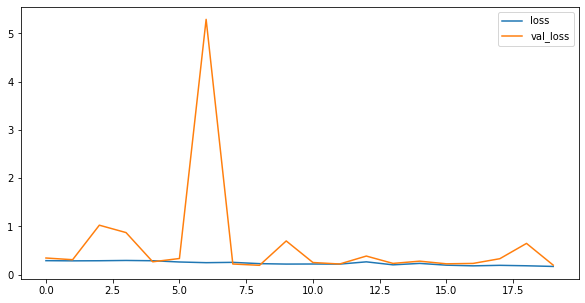

In [50]:
plt.figure(figsize=(10,5))
plt.plot(model.history.history["loss"],label="loss")
plt.plot(model.history.history["val_loss"],label="val_loss")
plt.legend()

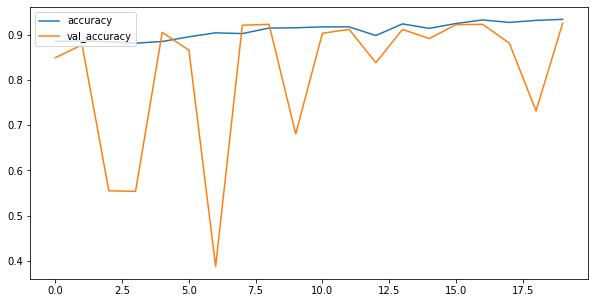

In [52]:
plt.figure(figsize=(10,5))
plt.plot(model.history.history["accuracy"],label="accuracy")
plt.plot(model.history.history["val_accuracy"],label="val_accuracy")
plt.legend(loc='upper left')